torch.Size([100, 1, 28, 28]) torch.Size([100])


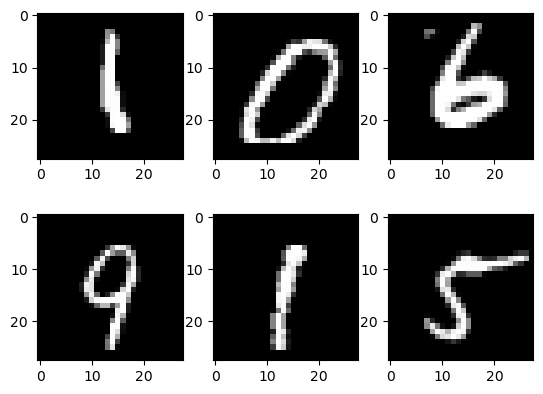

In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28 since need to flatten input from 2D to 1D tensor
hidden_size = 100 # can try different sizes
num_classes = 10 # number of categories, since 10 digits
num_epochs = 2 # number of times that the full dataset is trained
batch_size = 100 # number of training data samples for each iteration
learning_rate = 0.001 # magnitude of the change in the weights during update

# MNIST dataset
# convert image data to tensors to use in model
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader) # to iterate through samples
samples, labels = next(examples)
print(samples.shape, labels.shape) 
# samples.shape returns batch sample size 100, 1 channel (color information, only 1 since grayscale), 28x28 2D image array and labels.shape 100 (1 value per sample)

for i in range(6):
    plt.subplot(2,3, i+1) # plot image samples with 2 rows and 3 columns (since 6 images), and index i+1
    plt.imshow(samples[i][0], cmap='gray') # show each sample's data (only element 0 since 1 channel) and colormap (grayscale)
plt.show()

In [10]:
class NeuralNet(nn.Module): # custom neural net derived from pytorch
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) # layer 1 uses linear function on neurons using input
        self.relu = nn.ReLU() # activation function, decides how the neurons in next layer activate based on factoring in weights and activations of previous neurons (converts activation values to range 0 to +)
        self.l2 = nn.Linear(hidden_size, num_classes) # layer 2 uses linear function on neurons to return output
    
    def forward(self, x): # trains by going forward through neural net to calculate initial output values
        out = self.l1(x) # apply layer 1 on input neurons
        out = self.relu(out) 
        out = self.l2(out) # apply layer 2 on layer 1 output neurons to get class values
        return out 